In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import os
import pickle
import scipy.stats as st
import seaborn as sns
import sys

# Use this to load our modules.
module_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
experiments_dir = '../../experiments/correlation_extraction'
dataset_names = ['fifa19_v2', 'communities_and_crime_v2', 'musk']

In [3]:
results = dict()
for dataset_name in dataset_names:
    # Note: the C&C and Musk models are trained on more samples (the total dataset size), but the file path
    # used the command line argument value (which is 1000).
    nbr_data_samples = 2000 if dataset_name == 'fifa19_v2' else 1000
    path = f'{experiments_dir}/{dataset_name}/cols-4/nmb-100/nt-500_smt-logreg_nds-{nbr_data_samples}.pickle'
    with open(path, 'rb') as f:
        results[dataset_name] = pickle.load(f)

## New plot showing the $\mathbb{L}_1$ error

The $\mathbb{L}_1$ error is defined as: $\frac{1}{3}\sum_{i=1}^3|\hat{\rho}(X_i, Y)-\rho(X_i, Y)|$.

We compute this error from the values saved on disk.

[10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
Dataset=fifa19_v2
Method=ours: L1 error for 100 queries=0.21457663743920488
Method=random_guess: L1 error for 100 queries=0.5842561213105821
Dataset=communities_and_crime_v2
Method=ours: L1 error for 100 queries=0.1996970343010522
Method=random_guess: L1 error for 100 queries=0.5163021430343565
Dataset=musk
Method=ours: L1 error for 100 queries=0.2856841858846649
Method=random_guess: L1 error for 100 queries=0.508424784860395


Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode


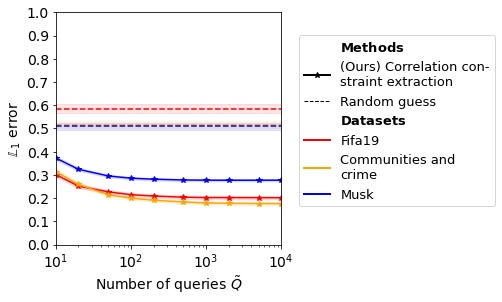

In [4]:
labels = ['Fifa19', 'Communities and \ncrime', 'Musk']

markers = ['*', None]
linestyles = ['-', '--']
colors = ['red', 'orange', 'blue']

fig, ax = plt.subplots(1, 1, figsize=(7.2, 4.3))

x = results[dataset_names[0]]['nbr_queries']
print(x)

for di, dataset_name in enumerate(dataset_names):
    print(f'Dataset={dataset_name}')
    rho_true = results[dataset_name]['rhos_true']
    for mi, method in enumerate(['ours', 'random_guess']):
        y, y_lower, y_upper = [], [], []
        for nbr_queries in x:
            rho_pred = np.array(results[dataset_name]['rhos_pred'][method][nbr_queries])
            rho_error = np.abs(rho_true - rho_pred).mean(axis=1)
            y.append(rho_error.mean())
            y_low, y_upp = st.t.interval(alpha=0.95, df=len(rho_error)-1, loc=np.mean(rho_error), scale=st.sem(rho_error))
            y_lower.append(y_low)
            y_upper.append(y_upp)
        print(f'Method={method}: L1 error for 100 queries={y[3]}')
        ax.plot(x, y, marker=markers[mi], ls=linestyles[mi], color=colors[di])
        ax.fill_between(x, y1=y_lower, y2=y_upper, alpha=0.1, color=colors[di])
        ax.set_xlim(10, 10000)
        
ax.set_xscale('log')
ax.set_xlabel(r'Number of queries $\tilde{Q}$', fontsize=14)
ax.set_ylim(0, 1)
yticks = np.arange(0, 1.01, 0.1)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{t:.1f}' for t in yticks], fontsize=14)
ax.set_ylabel(r'$\mathbb{L}_1$ error', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
custom_lines = [Line2D([], [], lw=0),
                Line2D([0], [0], color='black', lw=2, marker=markers[0], ls=linestyles[0]),
                Line2D([0], [0], color='black', lw=1, marker=markers[1], ls=linestyles[1]),
                Line2D([], [], lw=0),
                Line2D([0], [0], color=colors[0], lw=2),
                Line2D([0], [0], color=colors[1], lw=2),
                Line2D([0], [0], color=colors[2], lw=2)]
custom_names = [r'$\bf{Methods}$','(Ours) Correlation con-\nstraint extraction','Random guess', r'$\bf{Datasets}$'] + labels
ax.legend(custom_lines, custom_names, fontsize=13, bbox_to_anchor=(1.05, 0.93))
plt.tight_layout()
plt.savefig(f'../../plots/correlation_extraction.pdf', bbox_inches='tight')
plt.savefig(f'../../plots/correlation_extraction.png', bbox_inches='tight')
plt.show()